# **Case Study: How Does a Bike-Share Navigate Speedy Success?**

Kate Lao

09/2023

### **Introduction**

This is a capstone assignment from Google Data Analytics Professional Certificate. The information are used in this case study is from an Cyclistic bike-share company. The process of this data analysis project will be 6 steps as followed: *Ask, Prepare, Process Analyze, Share, and Act*.

### **1. Ask**
#### **Scenario**
I am a Junior Data Analyst currently employed within the Marketing Analytics team at Cyclistic, a prominent bike-sharing company located in Chicago. Our Director of Marketing is convinced that the future prosperity of our company hinges on our ability to maximize annual memberships. Consequently, our team is dedicated to gaining a comprehensive understanding of the distinctions in bike usage patterns between casual riders and annual members. 

#### **Stakeholders**
* Lily Moreno: The director of marketing and manager
* Cyclistic marketing analytics team: A team of data analysts who are responsible for collecting, analyzing, and reporting data that helps guide Cyclistic marketing strategy
* Cyclistic executive team: The notoriously detail-oriented executive team will decide whether to approve the recommended marketing program

There are three questions will guide the future marketing program: 
1. How do annual members and casual riders use Cyclistic bikes differently? 
2. Why would casual riders buy Cyclistic annual memberships? 
3. How can Cyclistic use digital media to influence casual riders to become members? 

#### **Objectives**
Therefore, the statement of business task is to find the answers for the above three questions and based on these insights to design a new marketing strategy to convert casual riders into annual members. 

### **2. Prepare** 
This case study is used Cyclistic’s historical trip data to analyze and identify trends. ([Cyclistic trip data](https://divvy-tripdata.s3.amazonaws.com/index.html)) The data has been sourced from Motivate International Inc., a reputable company whose dataset is not only highly cited but also original. This dataset provides a wealth of information, including detailed trip data categorized into yearly, monthly, and quarterly segments. To grasp the most current trends among Cyclistic's riders, my analysis will focus on the most recent year's worth of data, spanning from August 2022 to July 2023. This timeframe ensures that the insights are based on the latest patterns and behaviors exhibited by the cyclists, offering a clear perspective for the analytical endeavors.

### **3. Process**
Given the substantial size of the datasets at hand, I have chosen to leverage R for data processing and cleaning at the Kaggle platform. R not only facilitates the efficient management of large datasets but also offers a seamless integration of data manipulation and visualization within a single platform. This approach ensures that our analytical workflow remains both streamlined and effective.

In [1]:
#prepare require packages
library(lubridate) # for date functions
library(tidyverse) # for data import and wrangling
library(ggplot2) # for visualization


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr   1.1.2     ✔ readr   2.1.4
✔ forcats 1.0.0     ✔ stringr 1.5.0
✔ ggplot2 3.4.2     ✔ tibble  3.2.1
✔ purrr   1.0.1     ✔ tidyr   1.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


#### STEP 1: Collect data

In [2]:
# import data
data_Aug <-read.csv('/kaggle/input/cyclistic-bike-share-apr-22-mar-23/Cyclistic_Dataset_0423_0323/New folder/Chic_bike_Aug_22.csv')
data_Sep <-read.csv('/kaggle/input/cyclistic-bike-share-apr-22-mar-23/Cyclistic_Dataset_0423_0323/New folder/Chic_bike_Sep_22.csv')
data_Oct <-read.csv('/kaggle/input/cyclistic-bike-share-apr-22-mar-23/Cyclistic_Dataset_0423_0323/New folder/Chic_bike_Oct_22.csv')
data_Nov <-read.csv('/kaggle/input/cyclistic-bike-share-apr-22-mar-23/Cyclistic_Dataset_0423_0323/New folder/Chic_bike_Nov_22.csv')
data_Dec <-read.csv('/kaggle/input/cyclistic-bike-share-apr-22-mar-23/Cyclistic_Dataset_0423_0323/New folder/Chic_bike_Dec_22.csv')
data_Jan <-read.csv('/kaggle/input/cyclistic-bike-share-apr-22-mar-23/Cyclistic_Dataset_0423_0323/New folder/Chic_bike_Jan_23.csv')
data_Feb <-read.csv('/kaggle/input/cyclistic-bike-share-apr-22-mar-23/Cyclistic_Dataset_0423_0323/New folder/Chic_bike_Feb_23.csv')
data_Mar <-read.csv('/kaggle/input/cyclistic-bike-share-apr-22-mar-23/Cyclistic_Dataset_0423_0323/New folder/Chic_bike_Mar_23.csv')
data_Apr <-read.csv('/kaggle/input/cyclistic-bike-share-apr-22-mar-23/Chic_bike_Apr_23.csv.csv')
data_May <-read.csv('/kaggle/input/cyclistic-bike-share-apr-22-mar-23/Chic_bike_May_23.csv.csv')
data_Jun <-read.csv('/kaggle/input/cyclistic-bike-share-apr-22-mar-23/Chic_bike_Jun_23.csv.csv')
data_Jul <-read.csv('/kaggle/input/cyclistic-bike-share-apr-22-mar-23/Chic_bike_Jul_23.csv.csv')

#### STEP 2: Wrangle data and Combine into a single file

In [3]:
# Creat the function to check whether the column names of 12 datasets are the same or not
check_column_names <- function(dataset_list) {
  # Extract column names from the first dataset
  reference_col_names <- colnames(dataset_list[[1]])
  
  # Iterate through the rest of the datasets
  for (i in 2:length(dataset_list)) {
    if (!identical(reference_col_names, colnames(dataset_list[[i]]))) {
      return(FALSE)  # Column names are not the same
    }
  }
  
  return(TRUE)  # Column names are the same for all datasets
}

# Check column names
datasets <- list(data_Aug, data_Sep, data_Oct, data_Nov, data_Dec,
                          data_Jan, data_Feb, data_Mar, data_Apr, data_May,
                          data_Jun, data_Jul)
result <- check_column_names(datasets)
cat("Column names are the same:", result)

Column names are the same: TRUE

In [4]:
# Combine all data into one data frame
all_tripdata <- bind_rows(data_Aug, data_Sep, data_Oct, data_Nov, data_Dec,
                          data_Jan, data_Feb, data_Mar, data_Apr, data_May,
                          data_Jun, data_Jul)

In [5]:
#write.csv(all_tripdata, "all_tripdata.csv", row.names = FALSE)
#all_tripdata <- read.csv("/kaggle/input/all-tripdata/all_tripdata.csv")

# check the data
glimpse(all_tripdata)

Rows: 5,723,606
Columns: 13
$ ride_id            <chr> "550CF7EFEAE0C618", "DAD198F405F9C5F5", "E6F2BC47B6…
$ rideable_type      <chr> "electric_bike", "electric_bike", "electric_bike", …
$ started_at         <chr> "2022-08-07 21:34:15", "2022-08-08 14:39:21", "2022…
$ ended_at           <chr> "2022-08-07 21:41:46", "2022-08-08 14:53:23", "2022…
$ start_station_name <chr> "", "", "", "", "", "", "", "", "", "", "", "", "",…
$ start_station_id   <chr> "", "", "", "", "", "", "", "", "", "", "", "", "",…
$ end_station_name   <chr> "", "", "", "", "", "", "", "", "", "", "", "", "",…
$ end_station_id     <chr> "", "", "", "", "", "", "", "", "", "", "", "", "",…
$ start_lat          <dbl> 41.93, 41.89, 41.97, 41.94, 41.85, 41.79, 41.89, 41…
$ start_lng          <dbl> -87.69, -87.64, -87.69, -87.65, -87.65, -87.72, -87…
$ end_lat            <dbl> 41.94, 41.92, 41.97, 41.97, 41.84, 41.82, 41.89, 41…
$ end_lng            <dbl> -87.72, -87.64, -87.66, -87.69, -87.66, -87.69, -87…
$ member_cas

#### STEP 3: Clean up and Add data to prepare for analysis

In [6]:
# Add columns that list the date, month, day, and year of each ride
all_tripdata$date <- as.Date(all_tripdata$started_at) #The default format is yyyy-mm-dd
all_tripdata$month <- format(as.Date(all_tripdata$date), "%m")
all_tripdata$day <- format(as.Date(all_tripdata$date), "%d")
all_tripdata$year <- format(as.Date(all_tripdata$date), "%Y")
all_tripdata$day_of_week <- format(as.Date(all_tripdata$date), "%A")

# Add a "ride_length" calculation to all_trips (in mins)
# https://stat.ethz.ch/R-manual/R-devel/library/base/html/difftime.html
all_tripdata$ride_length <- difftime(all_tripdata$ended_at,
                                     all_tripdata$started_at,units = "mins")

# Inspect the structure of the columns
str(all_tripdata)

'data.frame':	5723606 obs. of  19 variables:
 $ ride_id           : chr  "550CF7EFEAE0C618" "DAD198F405F9C5F5" "E6F2BC47B65CB7FD" "F597830181C2E13C" ...
 $ rideable_type     : chr  "electric_bike" "electric_bike" "electric_bike" "electric_bike" ...
 $ started_at        : chr  "2022-08-07 21:34:15" "2022-08-08 14:39:21" "2022-08-08 15:29:50" "2022-08-08 02:43:50" ...
 $ ended_at          : chr  "2022-08-07 21:41:46" "2022-08-08 14:53:23" "2022-08-08 15:40:34" "2022-08-08 02:58:53" ...
 $ start_station_name: chr  "" "" "" "" ...
 $ start_station_id  : chr  "" "" "" "" ...
 $ end_station_name  : chr  "" "" "" "" ...
 $ end_station_id    : chr  "" "" "" "" ...
 $ start_lat         : num  41.9 41.9 42 41.9 41.9 ...
 $ start_lng         : num  -87.7 -87.6 -87.7 -87.7 -87.7 ...
 $ end_lat           : num  41.9 41.9 42 42 41.8 ...
 $ end_lng           : num  -87.7 -87.6 -87.7 -87.7 -87.7 ...
 $ member_casual     : chr  "casual" "casual" "casual" "casual" ...
 $ date              : Date, format

In [7]:
# Convert "ride_length" to numeric so we can run calculations on the data
all_tripdata$ride_length <- as.numeric(as.character(all_tripdata$ride_length))
is.numeric(all_tripdata$ride_length)

[1] TRUE

In [8]:
# Check summary statistics for ride length
summary(all_tripdata$ride_length)

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
-10353.35      5.45      9.60     18.36     17.08  51461.40 

In [9]:
# Remove negative data of ride length to ensure data quality
# Assign new version of all trip data
All_trips <- all_tripdata[!(all_tripdata$ride_length<0),]

In [10]:
# Remove unused columns for analysis
All_trips <- All_trips %>% select(-c(start_lat, start_lng, end_lat, end_lng))


In [11]:
# Check missing values in each column
missing_values <- sapply(All_trips, function(x) sum(is.na(x)))

# Display the results
print(missing_values)

           ride_id      rideable_type         started_at           ended_at 
                 0                  0                  0                  0 
start_station_name   start_station_id   end_station_name     end_station_id 
                 0                  0                  0                  0 
     member_casual               date              month                day 
                 0                  0                  0                  0 
              year        day_of_week        ride_length 
                 0                  0                  0 


### **4 & 5. Analyze and Share**

In [12]:
# Look at summary statistics of data
summary(All_trips)

   ride_id          rideable_type       started_at          ended_at        
 Length:5723485     Length:5723485     Length:5723485     Length:5723485    
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
 start_station_name start_station_id   end_station_name   end_station_id    
 Length:5723485     Length:5723485     Length:5723485     Length:5723485    
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            

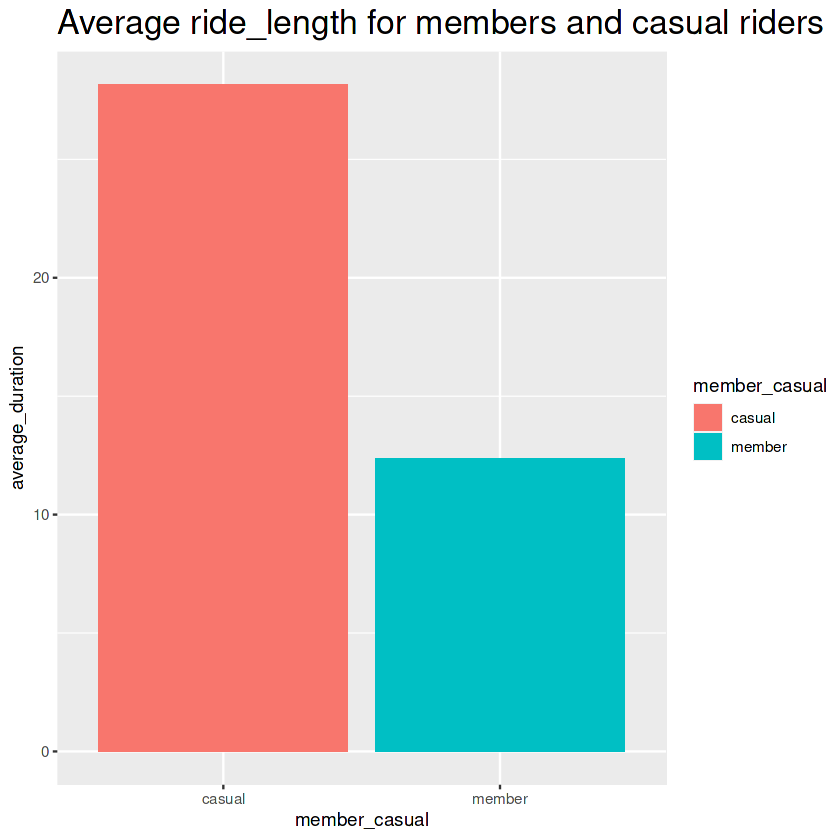

In [13]:
# Average ride_length for members and casual riders
All_trips %>% 
  group_by(member_casual) %>% 
  summarise(average_duration = mean(ride_length)) %>% 
  ggplot(aes(x = member_casual, y = average_duration, fill = member_casual)) +
  geom_col(position = "dodge")+
  labs(title=("Average ride_length for members and casual riders")) +
    theme(plot.title = element_text(size = 20))

The graph illustrates that casual riders typically rent bikes for a longer average duration compared to members. Members may often use bikes for commuting, while casual riders engage them for various purposes like exercise, city exploration, or attending events, so casual riders spend more ride duration.

In [14]:
# Increase the size of the plot shown below
options(repr.plot.width = 15, repr.plot.height =8)

`summarise()` has grouped output by 'member_casual', 'weekday'. You can
override using the `.groups` argument.


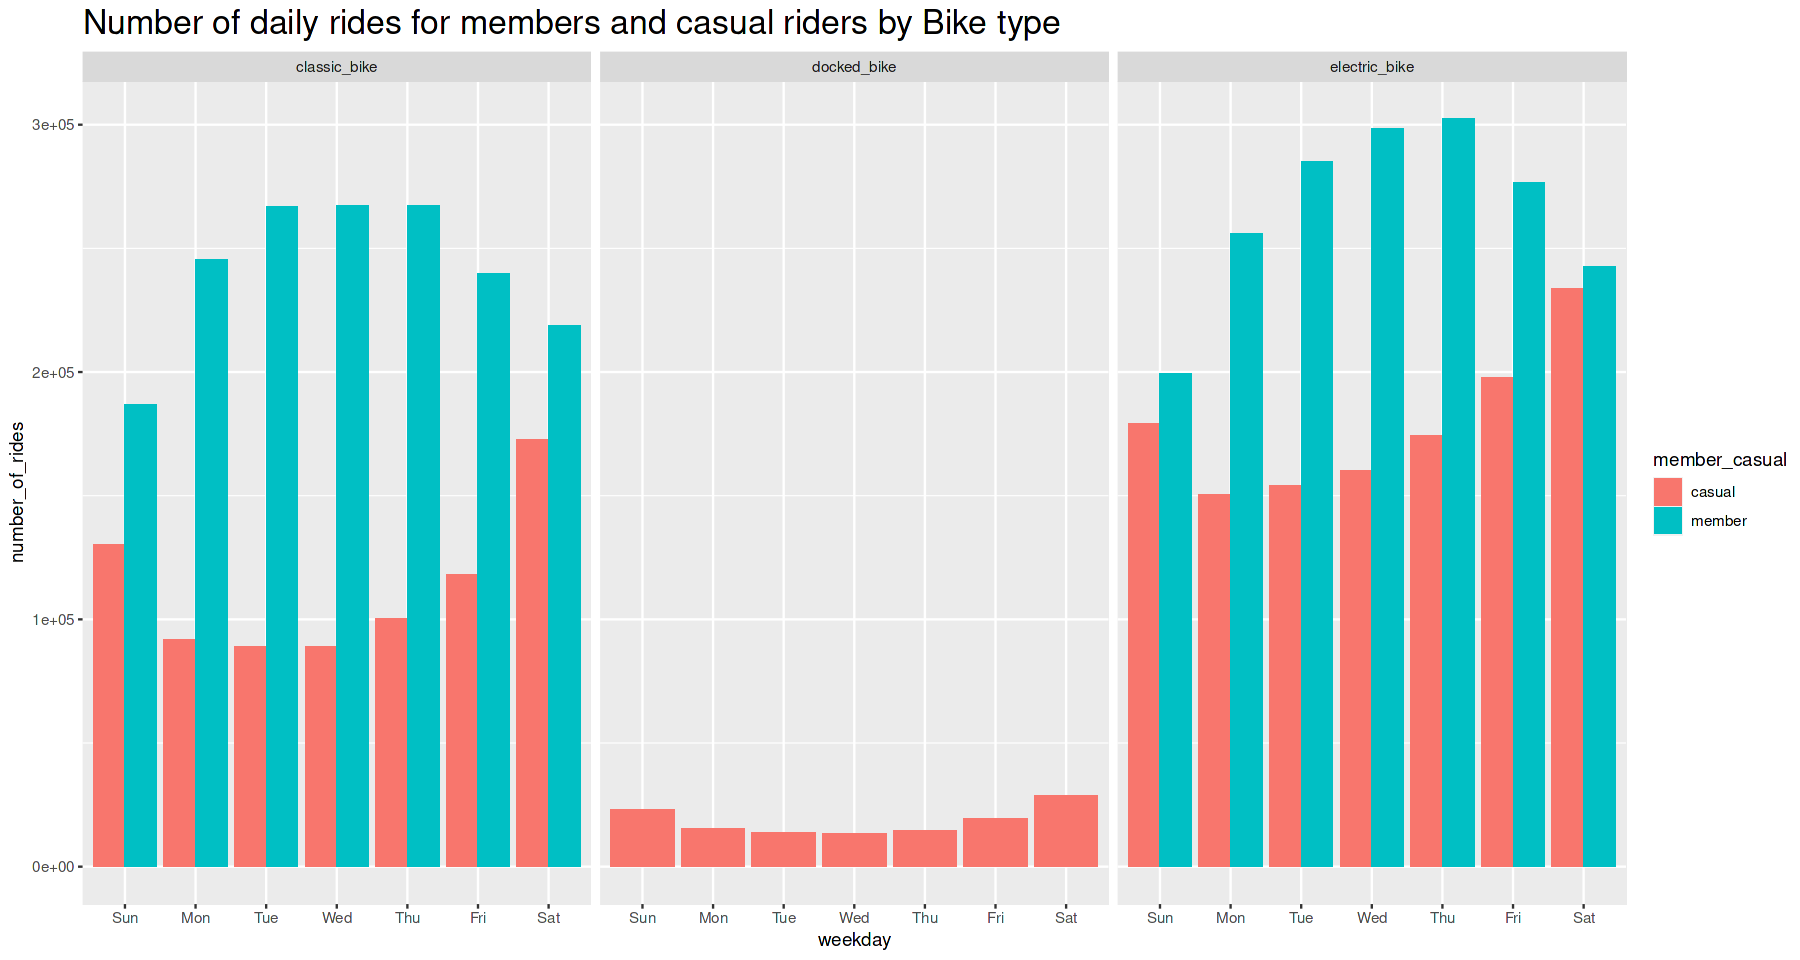

In [15]:
# Number of daily rides for members and casual riders
All_trips %>% 
  mutate(weekday = wday(started_at, label = TRUE)) %>% 
  group_by(member_casual, weekday,rideable_type) %>% 
  summarise(number_of_rides = n()) %>% 
  ggplot(aes(x = weekday, y = number_of_rides, fill = member_casual)) +
  geom_col(position = "dodge") +
  facet_wrap(~ rideable_type) +
  labs(title=("Number of daily rides for members and casual riders by Bike type")) +
    theme(plot.title = element_text(size = 20))

The graph provides us with two valuable insights. Firstly, it indicates that member riders predominantly opt for classic bikes and electric bikes. Secondly, a clear trend emerges: member riders exhibit higher usage on weekdays (Monday through Friday), whereas casual riders tend to ride more on weekends

In [16]:
All_trips %>%
  group_by(day_of_week) %>%
  summarise(The_number_of_ride = n()) %>% 
  arrange(desc(The_number_of_ride))

day_of_week,The_number_of_ride
<chr>,<int>
Saturday,896829
Thursday,859122
Friday,851859
Wednesday,828309
Tuesday,808857
Monday,759410
Sunday,719099


`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.


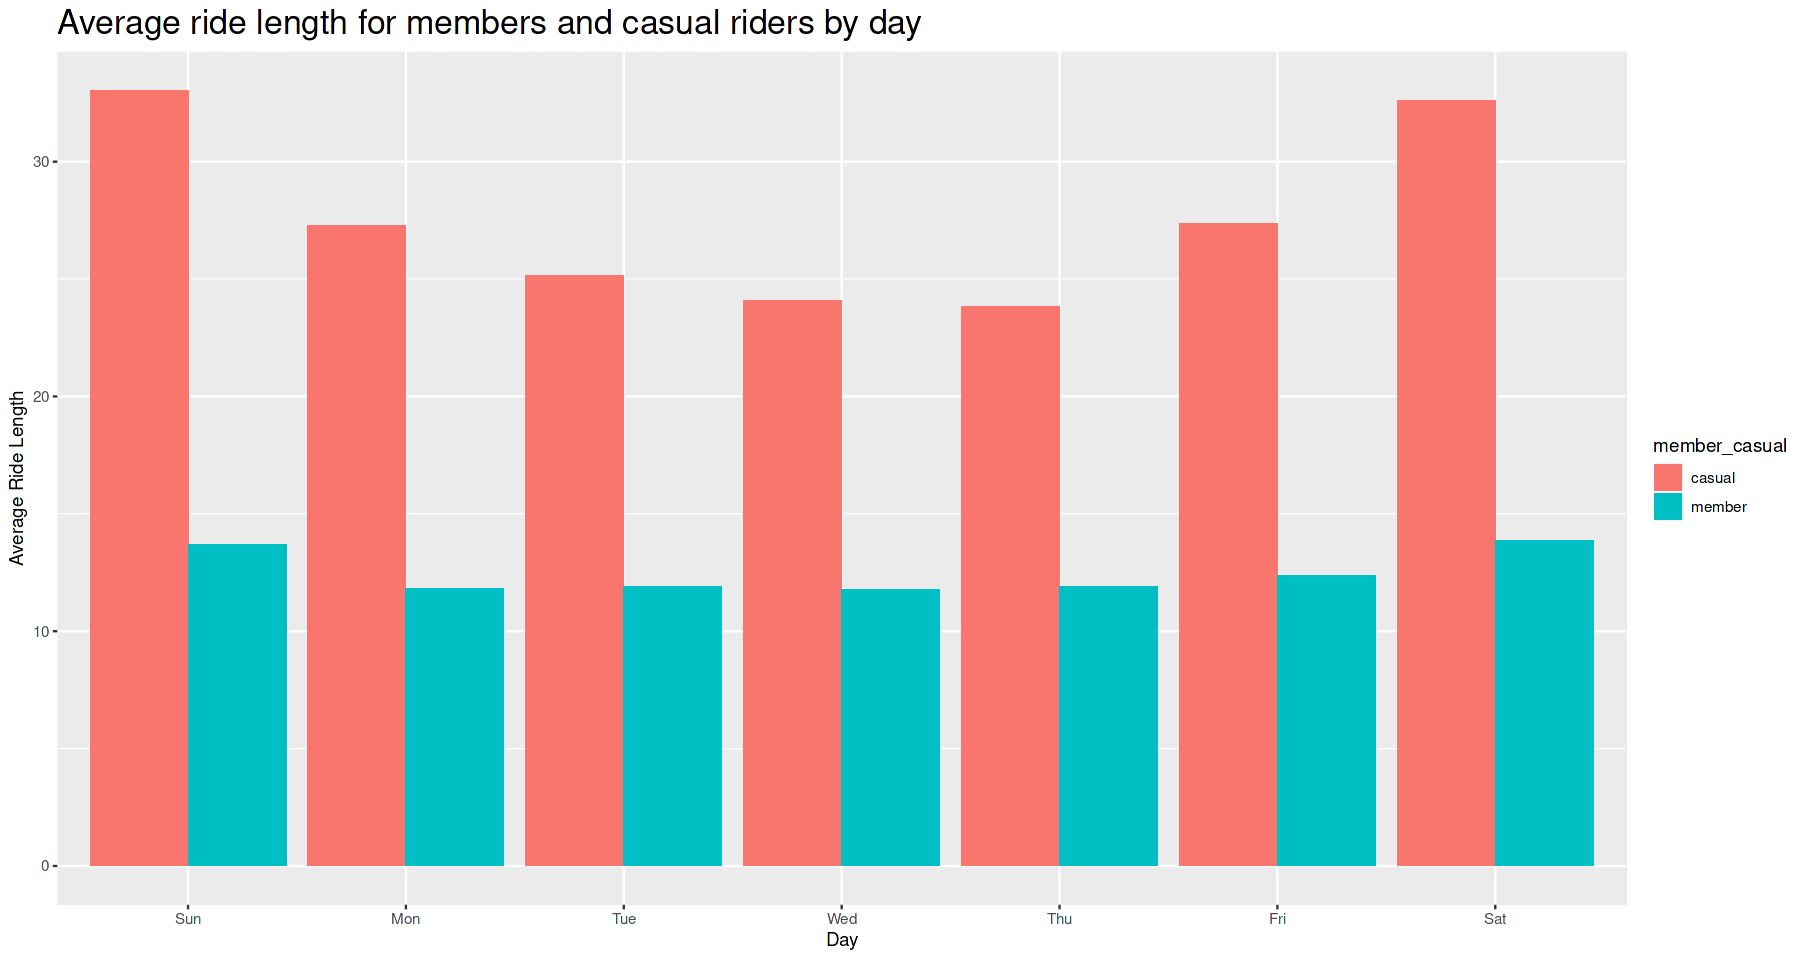

In [17]:
# Average ride_length for members and casual riders by day_of_week
All_trips %>% 
  mutate(weekday = wday(started_at, label = TRUE)) %>% 
  group_by(member_casual, weekday) %>% 
  summarise(average_duration = mean(ride_length)) %>% 
  ggplot(aes(x = weekday, y = average_duration, fill = member_casual)) +
  geom_col(position = "dodge")+
  labs(x = "Day", y = "Average Ride Length", 
       title=("Average ride length for members and casual riders by day")) +
    theme(plot.title = element_text(size = 20))

The graph indicates that casual riders have longer bike rental durations, particularly on Sundays, Saturdays, and Fridays. In contrast, members exhibit steady daily riding patterns, but they also ride longer on these three days.

`summarise()` has grouped output by 'member_casual', 'month'. You can override
using the `.groups` argument.


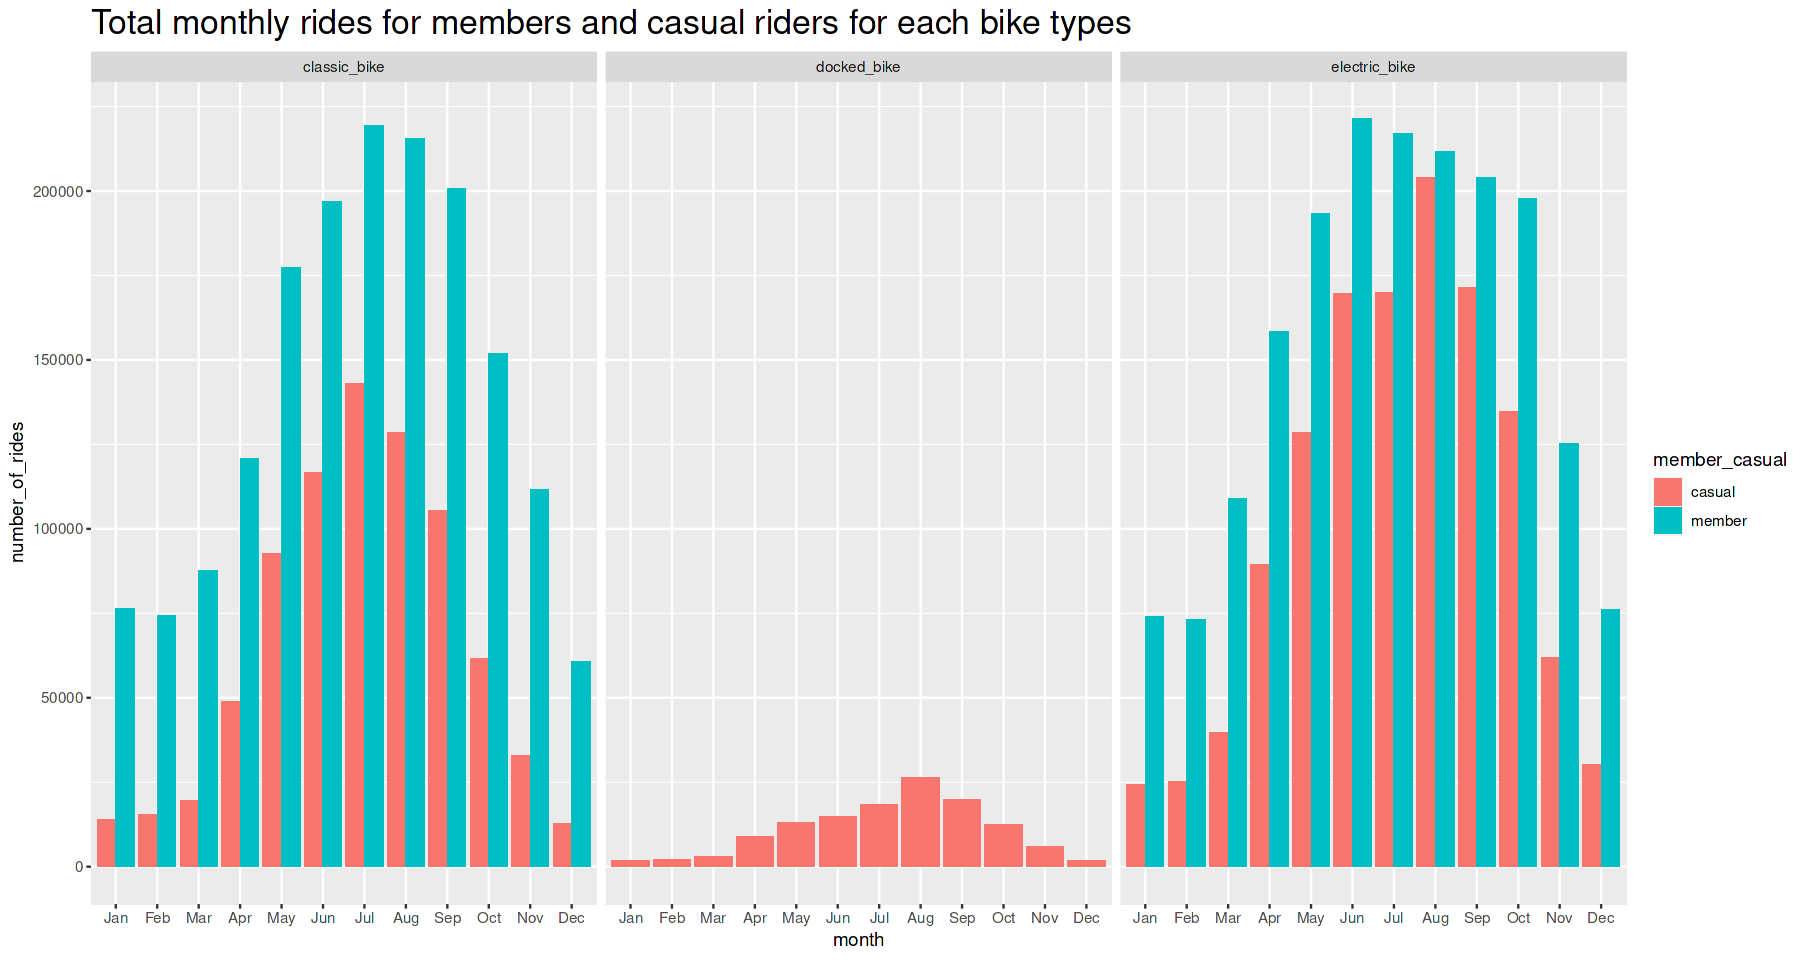

In [18]:
# Total monthly rides for members and casual riders for each bike types
All_trips %>% 
  mutate(month = month(started_at, label = TRUE)) %>% 
  group_by(member_casual, month, rideable_type) %>% 
  summarise(number_of_rides = n()) %>% 
  ggplot(aes(x = month, y=number_of_rides, fill= member_casual )) +
  geom_col(position = "dodge") +
  facet_wrap(~ rideable_type) +
  labs(title=("Total monthly rides for members and casual riders for each bike types")) +
    theme(plot.title = element_text(size = 20))

In [19]:
All_trips %>%
  group_by(month) %>%
  summarise(The_number_of_ride = n()) %>% 
  arrange(desc(The_number_of_ride))

month,The_number_of_ride
<chr>,<int>
08,785917
07,767620
06,719611
09,701330
05,604817
10,558681
04,426586
11,337694
03,258678


Based on the monthly use, we can see from the plot is that bikes are used most frequently from Jun to August (summer period), and there are fewer riders in winter period. Members use more classic bikes than casual riders and electric bike are fairly popular among both members and casual riders.

`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.


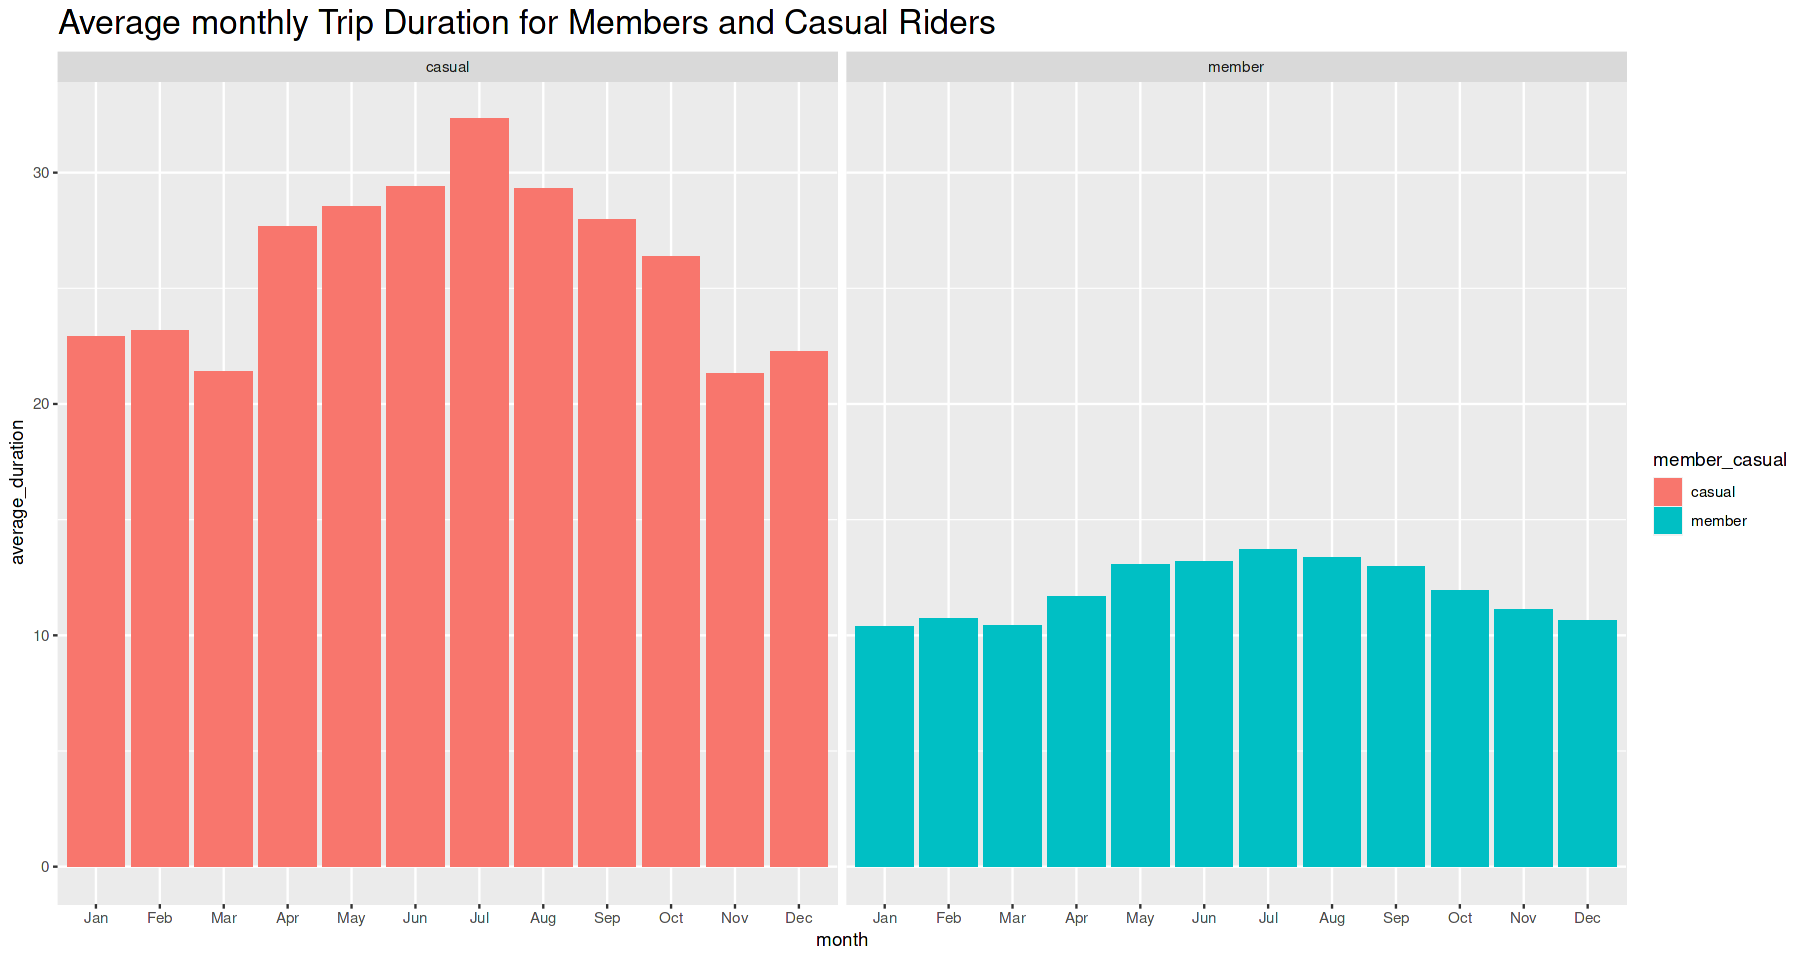

In [20]:
# Average monthly Trip Duration for Members and Casual Riders
All_trips %>% 
  mutate(month = month(started_at, label = TRUE)) %>% 
  group_by(member_casual, month) %>% 
  summarise(average_duration = mean(ride_length)) %>% 
  ggplot(aes(x = month, y=average_duration, fill=member_casual)) +
  geom_col(position = "dodge") +
  facet_wrap(~ member_casual) +
  labs(title=("Average monthly Trip Duration for Members and Casual Riders")) +
    theme(plot.title = element_text(size = 20))

The graph shows that the average ride time for member riders is between 10 and 15 minutes in all months except March, when it was slightly over 30 minutes. It is worth noting that casual riders travele for particularly long periods of time in May, June, July, and August.

`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.


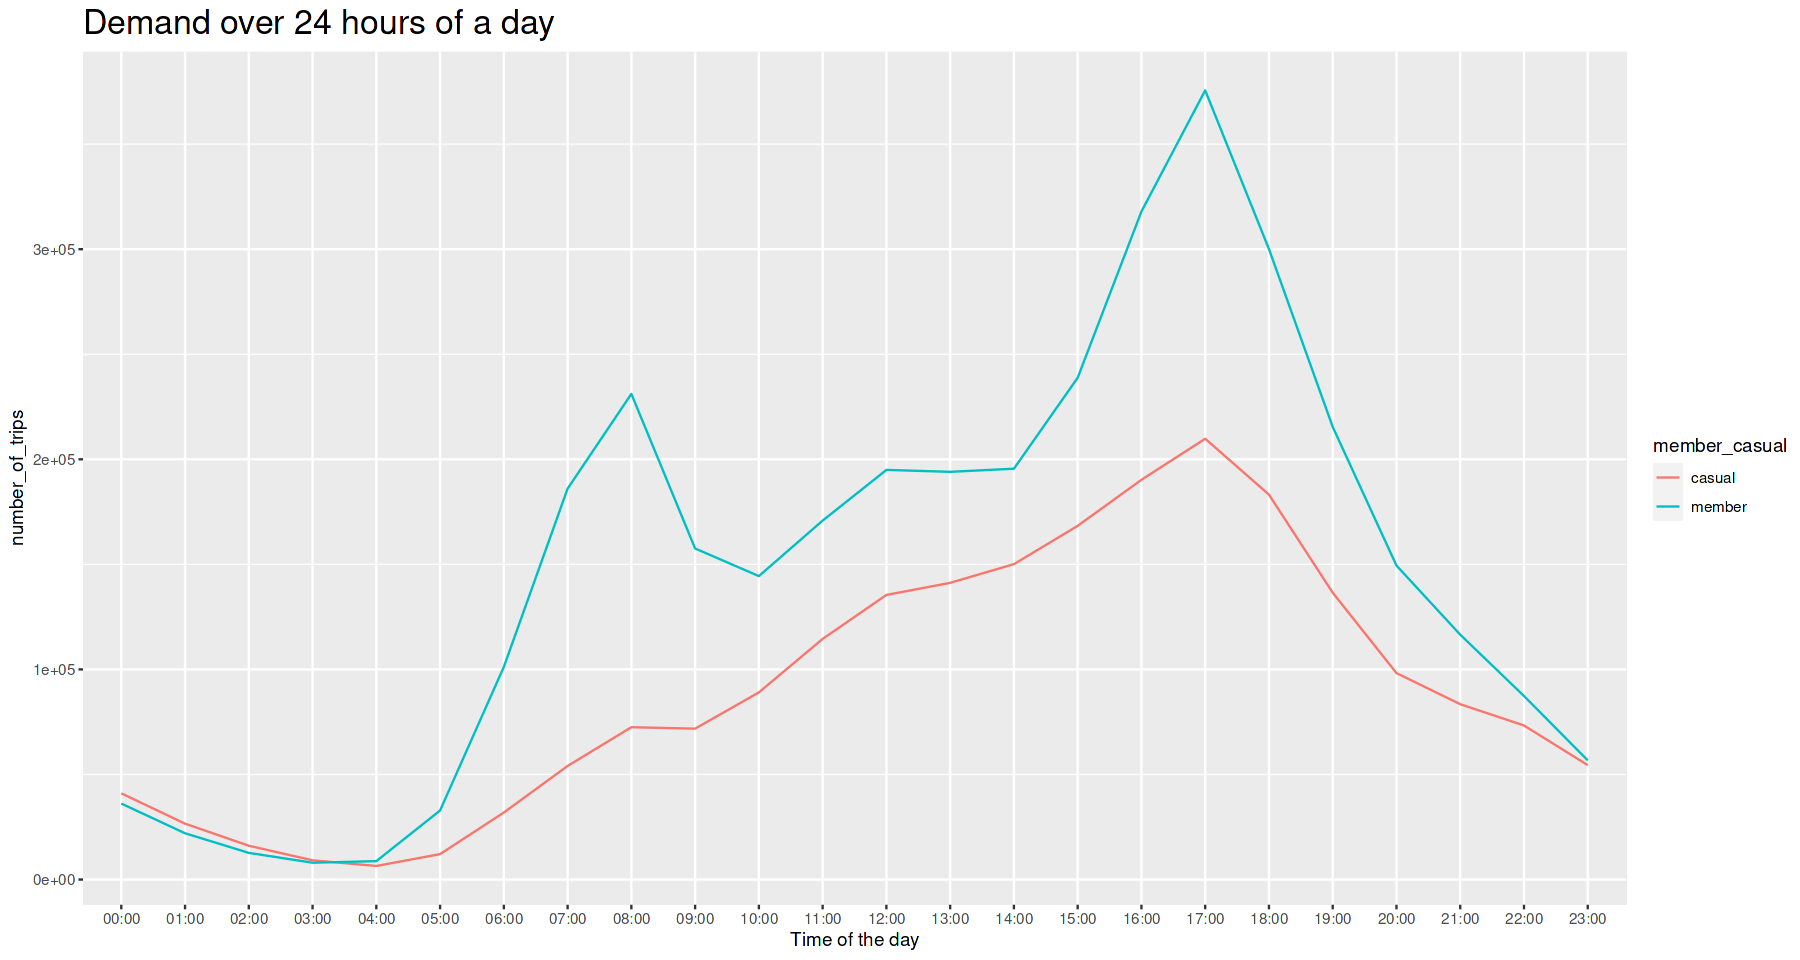

In [21]:
# Bike Demand over 24 hours of a day
All_trips %>%  
  mutate(time=format(as.POSIXct(All_trips$started_at), format = "%H:00")) %>% 
  group_by(member_casual, time) %>% 
  summarise(number_of_trips = n()) %>%
  ggplot(aes(x = time, y = number_of_trips, color = member_casual, group = member_casual)) +
  geom_line() +
  labs(title ="Demand over 24 hours of a day", x = "Time of the day") +
    theme(plot.title = element_text(size = 20))

The graph distinctly highlights two peak periods for members' demand: 7-9am and 5-7pm. These timeframes align with high casual riders as well. The fact that these hours coincide with morning and evening commuting hours assumes that commuters constitute the primary segment of the members

### **6. Act**
#### **Key Findings**
* Casual Riders' Behavior: Casual riders tend to rent bikes for longer durations. Their usage patterns are prominent on weekends and Fridays, indicating varied purposes for bike rentals.
* Member Riders' Patterns: Members predominantly use classic and electric bikes, with higher usage on weekdays, particularly during commuting hours (7-9am and 5-7pm). Their average ride time is generally between 10-15 minutes, except for March when it slightly exceeded 30 minutes.
* Seasonal Trends and Peak Hours: Bikes are most frequently used in the summer months (June to August), with a decline in winter. Both members and casual riders show peak demand during commuting hours, implying that commuters form a significant portion of the customer base.

#### **Three Recommendations**
1. Seasonal membership promotions: Since there is peak demand during the summer months, we can design targeted membership promotions that coincide with these periods, offering incentives for casual riders to switch to annual memberships during the high-activity summer season. For example, we can consider bundling offers that include accessories, guided tours, or summer-specific perks to sweeten the deal.

2. Commuter-Focused Initiatives: In order to target potential members during their commuting hours, we can run targeted digital marketing campaigns or social media promotions emphasizing the convenience of Cyclistic's bikes during busy commuting times, showcasing how an annual membership can simplify their daily commute.

3. Variety and Weekend promotions: Emphasize the availability of classic and electric bikes to members, as this aligns with their preferences. Therefore, we can create special weekend promotions or discounts for annual members to attract them to use the bikes more during weekends, which is a trend among casual riders. For example, the team can consider highlight features in ads like cost savings on longer trips or exclusive access to certain routes and bike types.


#### **Further Analysis**
The case study can be enhanced through a comprehensive user demographic analysis by collecting additional data:
* Gather essential demographic information from both casual riders and members, including age, gender, and location, evaluating the correlations between these factors and their bike rental patterns.
* Investigate whether specific age groups or genders exhibit tendencies towards longer bike rentals, particularly during peak hours, and determine if the preference for classic or electric bikes differs among distinct demographic segments.